# Clustering con Python

### Importar el dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/winequality-red.csv", sep = ";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

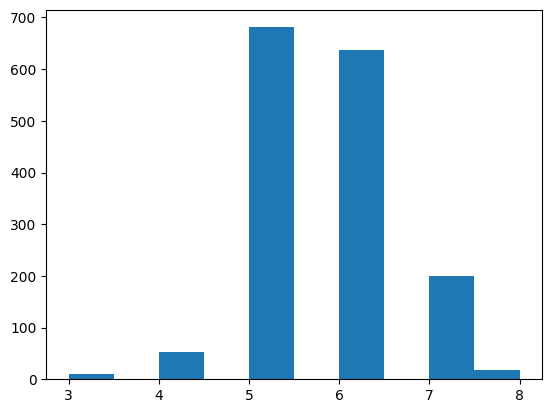

In [5]:
plt.hist(df["quality"])

In [18]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [7]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


# Regla del Codo

In [8]:
from sklearn.cluster import KMeans

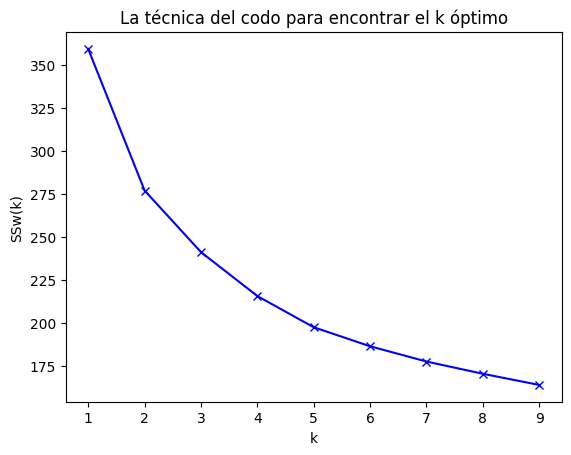

In [9]:
max_k = 10## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_norm)
    ssw.append(kmeanModel.inertia_)
    
#Representación del codo
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()    

## Clustering jerárquico con scikit-learn

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [22]:
md_h = pd.Series(clus.labels_)

In [23]:
clus.labels_

array([2, 2, 2, ..., 4, 4, 0], dtype=int64)

Text(0, 0.5, 'Número de vinos del cluster')

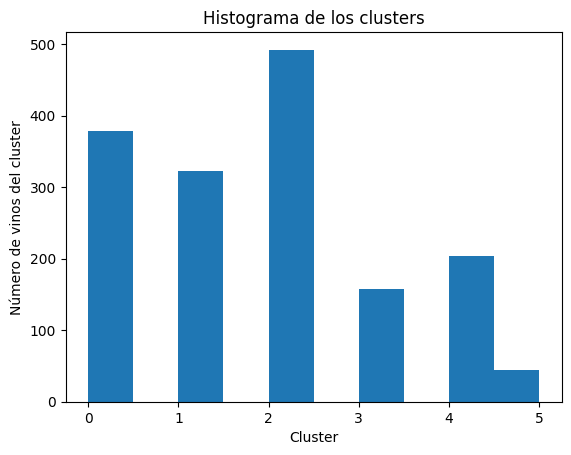

In [25]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [40]:
Z = linkage(df_norm, "ward")

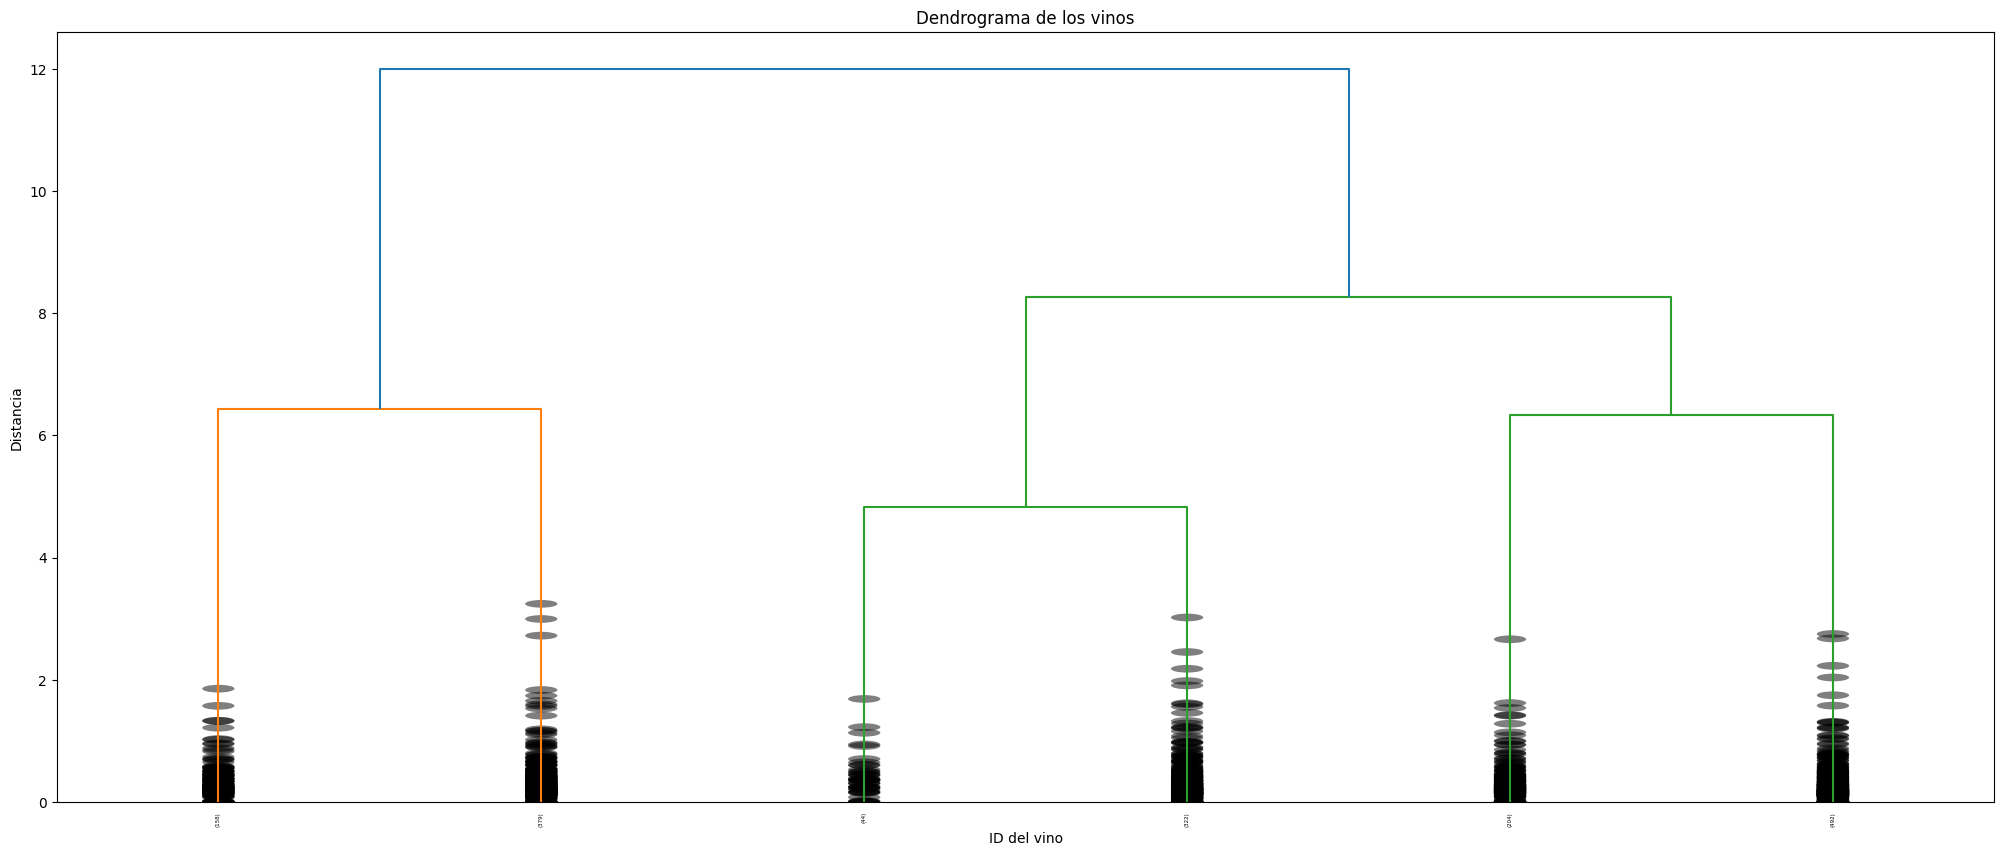

In [61]:
matplotlib.rcParams.update({'font.size': 10})

plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4., truncate_mode="lastp", p=6, show_leaf_counts=True, show_contracted=True)
plt.show()


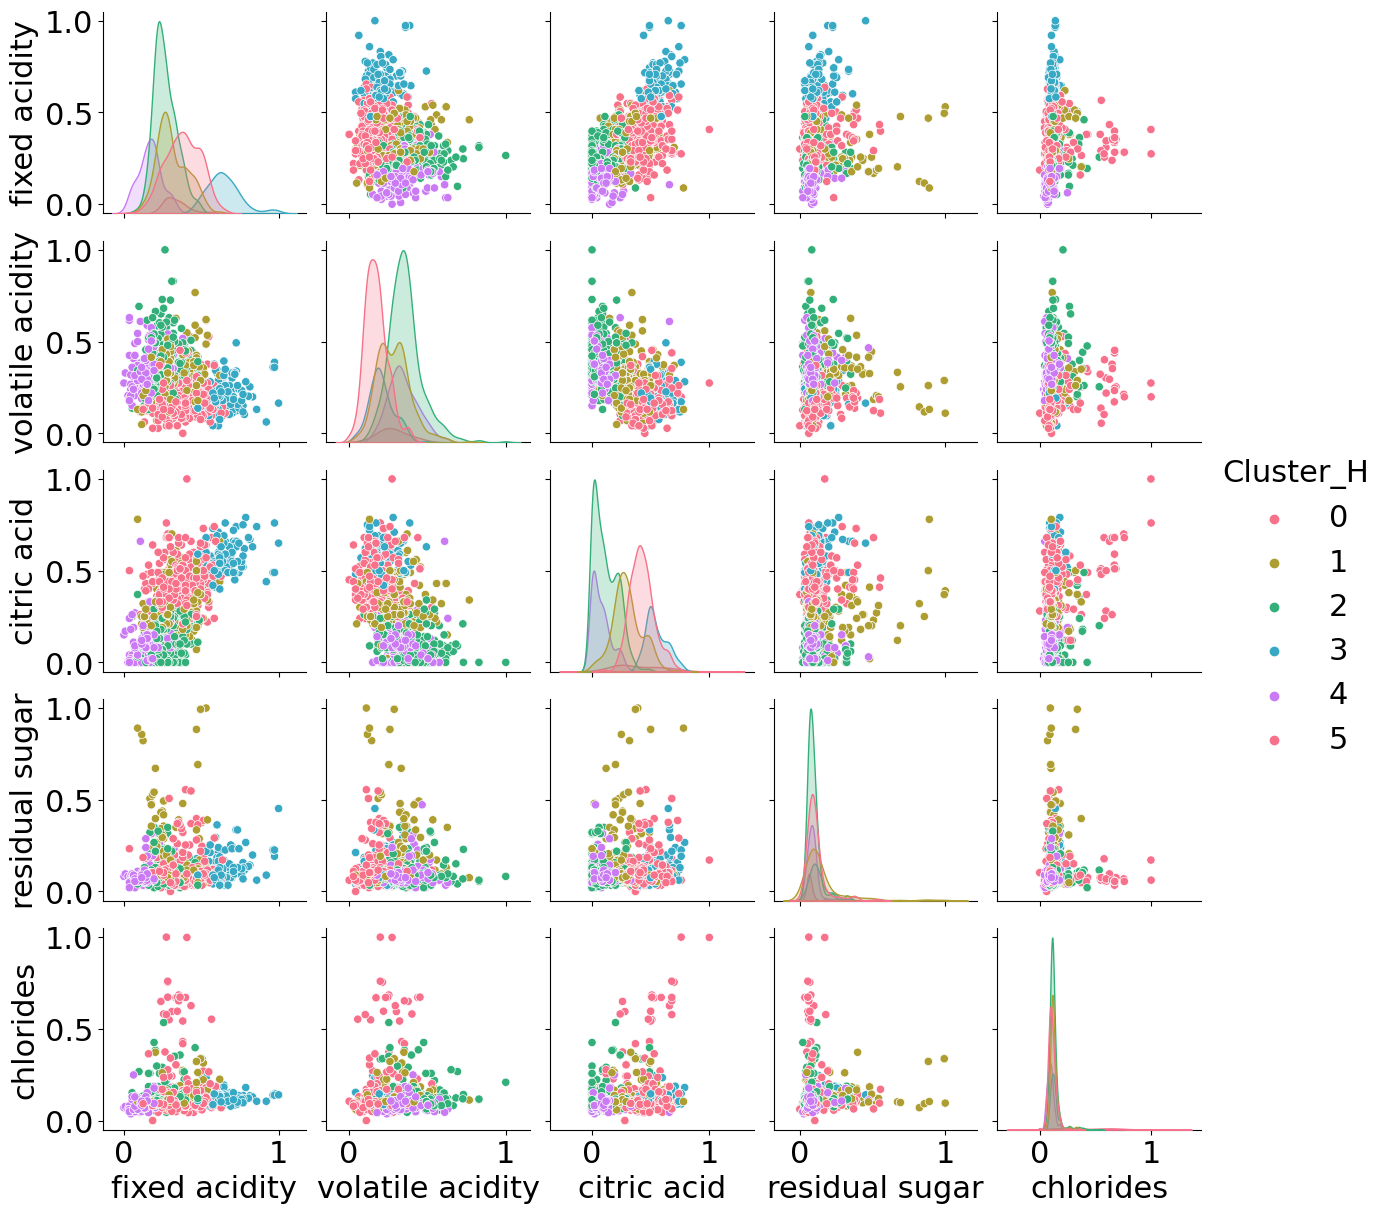

In [49]:
import seaborn as sns
df_norm["Cluster_H"] = md_h
sns.pairplot(df_norm, hue="Cluster_H", vars=df_norm.columns[:5], palette="husl")

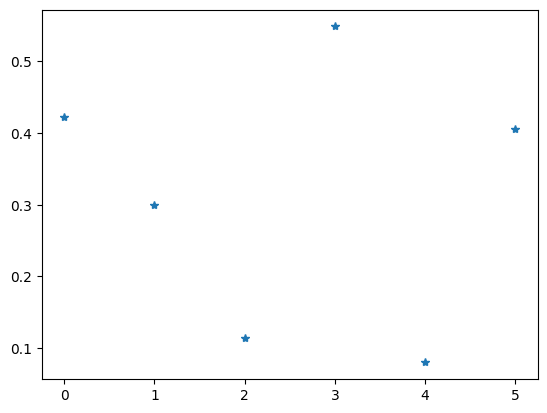

In [62]:
sr_mean_acid = df_norm.groupby("Cluster_H")["citric acid"].mean()

# Representacion grafica de los valores medios con respectto a los clusters usando estrellas como markers

plt.plot(sr_mean_acid, "*")


<AxesSubplot: >

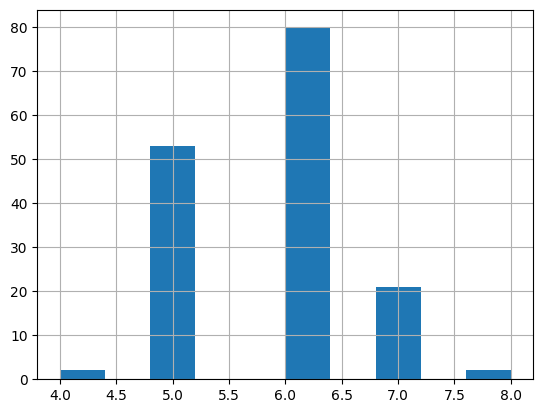

In [67]:
df.loc[df_norm[df_norm.Cluster_H == 3].index,:].quality.hist()

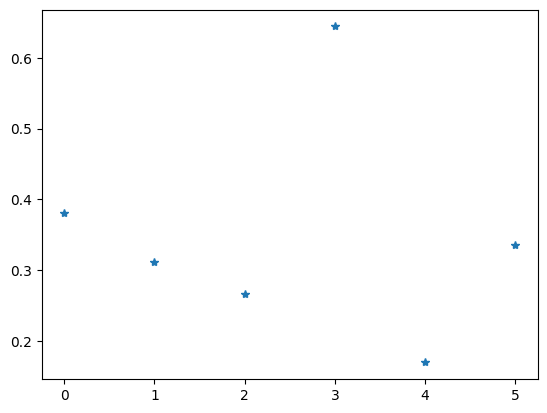

In [64]:
sr_mean_acid = df_norm.groupby("Cluster_H")["fixed acidity"].mean()

# Representacion grafica de los valores medios con respectto a los clusters usando estrellas como markers

plt.plot(sr_mean_acid, "*")

In [ ]:
sns.pairplot(df_norm, hue="Cluster_H", vars=df_norm.columns[5:5], palette="husl")

## K-means

In [22]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [24]:
model = KMeans(n_clusters=6,)
model.fit(df_norm)

KMeans(n_clusters=6)

In [25]:
model.labels_

array([1, 1, 1, ..., 5, 1, 2], dtype=int32)

In [26]:
model.predict(df_norm)

array([1, 1, 1, ..., 5, 1, 2], dtype=int32)

In [27]:
md_k = pd.Series(model.labels_)

In [28]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [29]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([293.,   0., 371.,   0., 231.,   0., 267.,   0., 220., 217.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

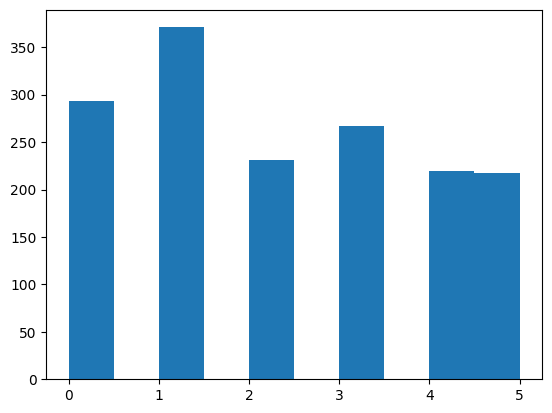

In [30]:
plt.hist(md_k)

In [31]:
model.cluster_centers_

array([[0.33320245, 0.27888167, 0.28194539, 0.08717098, 0.13802868,
        0.13901841, 0.12984961, 0.51939028, 0.41135686, 0.18624185,
        0.20939879, 0.47918089],
       [0.23941512, 0.3832201 , 0.0702965 , 0.09357346, 0.12079432,
        0.16527467, 0.10690236, 0.482082  , 0.52208332, 0.1537518 ,
        0.23495058, 0.4296496 ],
       [0.36957438, 0.1547619 , 0.43294372, 0.10721698, 0.10513193,
        0.16444119, 0.08284766, 0.40408808, 0.41265296, 0.23996164,
        0.50616051, 0.71428571],
       [0.32063902, 0.27538351, 0.31378277, 0.1638192 , 0.13044212,
        0.40821332, 0.31330978, 0.54138274, 0.42879472, 0.19509296,
        0.22049361, 0.45692884],
       [0.59444891, 0.20222603, 0.54509091, 0.13816936, 0.1653817 ,
        0.14494238, 0.09627369, 0.66105994, 0.31750179, 0.24735983,
        0.29745921, 0.55545455],
       [0.17572693, 0.31794079, 0.09626728, 0.09364939, 0.0953894 ,
        0.24923736, 0.12429369, 0.32021898, 0.57687144, 0.18731201,
        0.49722321,

In [32]:
model.inertia_

188.5450554428512

## Interpretación final

In [33]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.333202,0.278882,0.281945,0.087171,0.138029,0.139018,0.129850,0.519390,0.411357,0.186242,0.209399,0.479181,1.552901
1,0.239415,0.383220,0.070296,0.093573,0.120794,0.165275,0.106902,0.482082,0.522083,0.153752,0.234951,0.429650,2.126685
2,0.369574,0.154762,0.432944,0.107217,0.105132,0.164441,0.082848,0.404088,0.412653,0.239962,0.506161,0.714286,0.082251
3,0.320639,0.275384,0.313783,0.163819,0.130442,0.408213,0.313310,0.541383,0.428795,0.195093,0.220494,0.456929,1.041199
4,0.594449,0.202226,0.545091,0.138169,0.165382,0.144942,0.096274,0.661060,0.317502,0.247360,0.297459,0.555455,2.427273
5,0.175727,0.317941,0.096267,0.093649,0.095389,0.249237,0.124294,0.320219,0.576871,0.187312,0.497223,0.617512,3.414747


# En clase

In [36]:
df_norm_k1 = df_norm[df_norm.clust_k == 1]
df_norm_k1.shape

(371, 14)

In [37]:
df_norm_k1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.230088,0.393836,0.13,0.075342,0.106845,0.154930,0.049470,0.395742,0.433071,0.125749,0.261538,0.4,2,1
1568,0.212389,0.301370,0.13,0.047945,0.108514,0.338028,0.127208,0.456681,0.472441,0.155689,0.123077,0.4,2,1
1593,0.194690,0.342466,0.08,0.068493,0.093489,0.380282,0.113074,0.472834,0.535433,0.293413,0.169231,0.6,4,1
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4,4,1


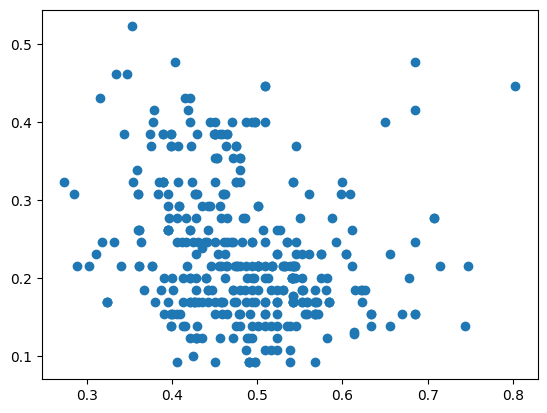

In [38]:
plt.scatter(df_norm_k1.density,df_norm_k1.alcohol)

In [43]:
df_norm.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'clust_h', 'clust_k'],
      dtype='object')

In [44]:
X_1 = df_norm.drop(['quality', 'clust_h', 'clust_k'],axis=1) 
X_2 = df_norm.drop(['quality', 'clust_h'],axis=1) 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [47]:
clf = RandomForestClassifier()

In [58]:
n_target = df['quality'].apply(lambda x: 0 if x< 6 else 1)

In [61]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,n_target,test_size=0.2)

In [62]:
y_train_1.shape

(1279,)

In [63]:
clf.fit(X_train_1,y_train_1)
preds_1 = clf.predict(X_test_1)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test_1,preds_1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       152
           1       0.86      0.82      0.84       168

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



In [66]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,n_target,test_size=0.2)

In [69]:
clf2 = RandomForestClassifier()

In [70]:
clf2.fit(X_train_2,y_train_2)
preds_2 = clf2.predict(X_test_2)

In [ ]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test_2,preds_2))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       153
           1       0.87      0.86      0.86       167

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [72]:
clf2.feature_importances_

array([0.06540968, 0.09553232, 0.06019951, 0.05098805, 0.06977146,
       0.05402214, 0.09771126, 0.08538582, 0.06686661, 0.11004755,
       0.15297105, 0.09109454])

In [73]:
clf2.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'clust_k'], dtype=object)

In [81]:
pd.DataFrame(list(zip(clf2.feature_names_in_,clf2.feature_importances_)),columns=['feature','importance']).sort_values('importance',ascending=False)

,feature,importance
10,alcohol,0.152971
9,sulphates,0.110048
6,total sulfur dioxide,0.097711
1,volatile acidity,0.095532
11,clust_k,0.091095
7,density,0.085386
4,chlorides,0.069771
8,pH,0.066867
0,fixed acidity,0.065410
2,citric acid,0.060200


In [82]:
pd.DataFrame(list(zip(clf2.feature_names_in_,clf2.feature_importances_)),columns=['feature','importance'])['importance'].sum()

1.0

# PCA

In [83]:
X_1 = df_norm.drop(['quality', 'clust_h', 'clust_k'],axis=1) 

In [84]:
X_1.shape

(1599, 11)

In [90]:
from sklearn.decomposition import PCA
import numpy as np

In [87]:
modelo_pca = PCA(11)
modelo_pca.fit(X_1)

PCA(n_components=11)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.35752287 0.55177617 0.70223939 0.7745608  0.82780409 0.87945644
 0.92028321 0.95525634 0.97944618 0.99412541 1.        ]


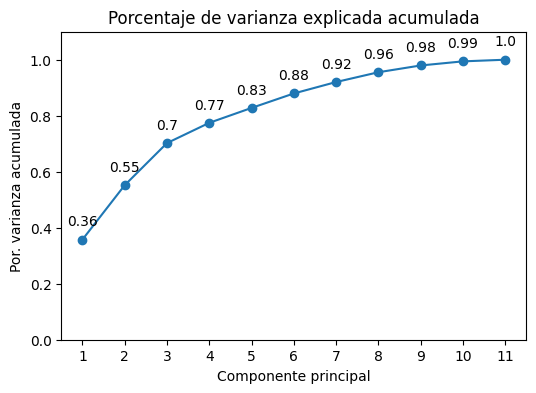

In [92]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X_1.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_1.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');